In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

Let's load the Nashville zipcode data and look at the first few rows
geopandas reads files with the read_file() method
The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [3]:
bikeracks = pd.read_csv('../data/bikeracks.csv')

In [4]:
bikeracks.shape

(430, 13)

In [5]:
bikeracks.head(5)

,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept
1,POINT (-86.63406252260494 36.185280037810095),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept
2,POINT (-86.62067056966654 36.1584215986261),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept
3,POINT (-86.68652592673462 36.18754669484766),Rack,4,Public,Existing,115,1,Park/Greenway,5,-86.686526,36.187547,"Two Rivers Golf Course, Stones River Greenway ...",Health Dept
4,POINT (-86.76218008308796 36.17245540617397),Rack,5,Public,Existing,103,3,Park/Community Center,15,-86.762180,36.172455,East Park & Community Center,Health Dept


In [10]:
# Select the columns wanted
bikeracks = bikeracks[['Quantity','Location','Capacity','LON','LAT']]

In [11]:
bikeracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quantity  430 non-null    int64  
 1   Location  430 non-null    object 
 2   Capacity  430 non-null    int64  
 3   LON       426 non-null    float64
 4   LAT       426 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 16.9+ KB


In [12]:
bikeracks['geometry'] = bikeracks.apply(lambda x: Point((float(x.LON), ##x here is to go through rows to apply the func.
                                                         float(x.LAT))), 
                                        axis=1)
bikeracks.head(3)

,Quantity,Location,Capacity,LON,LAT,geometry
0,1,Mall,12,-86.655453,36.049928,POINT (-86.65545277790001 36.0499277778)
1,2,Greenway,4,-86.634063,36.185280,POINT (-86.6340625226 36.18528003780001)
2,0,Park/Greenway,0,-86.620671,36.158422,POINT (-86.6206705697 36.1584215986)


In [13]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
bikeracks_geo = gpd.GeoDataFrame(bikeracks, 
                           crs = zipcodes.crs, ## make a match
                           geometry = bikeracks['geometry'])

In [15]:
type(bikeracks_geo)

geopandas.geodataframe.GeoDataFrame

In [16]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [17]:
stops_by_zip = gpd.sjoin(bikeracks_geo, zipcodes, op = 'within')

In [18]:
stops_by_zip.head()

,Quantity,Location,Capacity,LON,LAT,geometry,index_right,zip,po_name
0,1,Mall,12,-86.655453,36.049928,POINT (-86.65545 36.04993),51,37013,ANTIOCH
140,1,Elementary School,20,-86.698275,36.059083,POINT (-86.69827 36.05908),51,37013,ANTIOCH
141,0,Middle School,0,-86.672126,36.055141,POINT (-86.67213 36.05514),51,37013,ANTIOCH
142,2,Elementary School,52,-86.669383,36.067250,POINT (-86.66938 36.06725),51,37013,ANTIOCH
143,2,Middle School,56,-86.664239,36.067078,POINT (-86.66424 36.06708),51,37013,ANTIOCH


In [19]:
stops_by_zip['zip'].value_counts()

37203    51
37201    44
37206    36
37209    31
37219    29
37208    28
37207    21
37210    20
37216    17
37211    17
37115    16
37013    16
37214    15
37076    13
37221    10
37218    10
37217     8
37228     8
37205     7
37212     7
37213     5
37204     4
37215     3
37138     3
37220     3
37189     2
37080     1
37072     1
Name: zip, dtype: int64

In [20]:
stops_in_37203 = stops_by_zip.loc[stops_by_zip['zip'] == '37203']
stops_in_37203.shape

(51, 9)

In [21]:
polygon37203 = zipcodes.loc[zipcodes['zip'] == '37203']
polygon37203.shape

(1, 3)

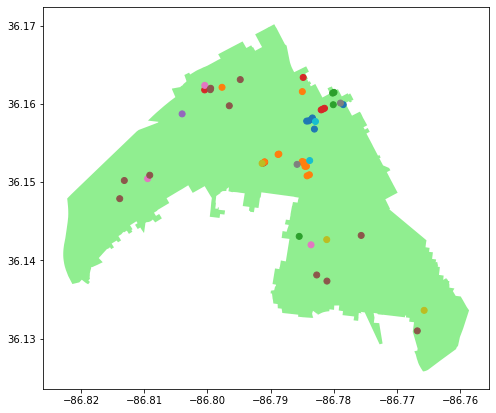

In [23]:
ax = polygon37203.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37203.plot( ax = ax, column = 'Location');
plt.show();

In [24]:
# add street maps
polygon37203.geometry.centroid

<ipython-input-24-86210a78ca89>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37203.geometry.centroid


35    POINT (-86.78899 36.14860)
dtype: geometry

In [25]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37203.geometry.centroid[35]
print(center)

POINT (-86.78898899667411 36.14860232841574)


<ipython-input-25-721b089a11c1>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37203.geometry.centroid[35]


In [26]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.14860232841574, -86.7889889966741]


In [27]:
#create our map of Nashville Zip Code 37207 and show it
map_37203 = folium.Map(location =  area_center,zoom_start = 12)
map_37203

In [28]:
i = 0
for row_index, row_values in stops_in_37203.iterrows():  ##useful to builder pop-up markers
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 14
values are:
 
Quantity                                         0
Location                                  Bus Stop
Capacity                                         0
LON                                       -86.7849
LAT                                        36.1525
geometry       POINT (-86.7849098061 36.152493619)
index_right                                     35
zip                                          37203
po_name                                  NASHVILLE
Name: 14, dtype: object
------------------------- 
index is 15
values are:
 
Quantity                                              0
Location                                       Bus Stop
Capacity                                              0
LON                                            -86.7847
LAT                                             36.1526
geometry       POINT (-86.78474937940001 36.1525574937)
index_right                                          35
zip                                           

In [29]:
#draw our zip code area: 37207
map_37203 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37203).add_to(map_37203) ##put our geodataframe onto the map

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37203.iterrows():
    loc = [row_values['LAT'], row_values['LON']]
    pop = str(row_values['Location'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(map_37203)
map_37203.save('../maps/map37203.html')  #save your map as an interactive map

#display our map
map_37203

In [30]:
folium.Map?

In [31]:
cluster_map_37203 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37203)

folium.GeoJson(polygon37203).add_to(cluster_map_37203)

# inside the loop add each markwe to the cluster
for row_index, row_values in stops_in_37203.iterrows():
    loc = [row_values['LAT'], row_values['LON']]
    pop = str(row_values['Location'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37203.save('../maps/cluster37203.html')

cluster_map_37203

In [32]:
#draw our zip code area: 37203
map_37203 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37203).add_to(map_37203)

#create a list of locations and pass them to FastMarkerCluster()  ##wont get pop up but get marker clusters quicker
locations = stops_in_37203[['LAT', 'LON']].values.tolist()
map_37203.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37203